In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

The Vasicek Model: $dr_t=a(b-r_t)dt+\sigma dW_t $
$$ P(t, T) = A(t, T) e^{-B(t,T) \cdot r_t} $$

$$ A(t, T) = \exp \left( (b - \frac{\sigma^2}{2a^2}) (B(t, T) - (T - t)) - \frac{\sigma^2}{4a} B(t, T)^2 \right) $$
$$ B(t, T) = \frac{1 - e^{- a (T -t)}} {a} $$


In [3]:
dd=pd.read_excel('df.xlsx')                                
dd                                

,Date de référence,1 J,7 J,1 M,2 M,3 M,6 M,9 M,1Y,2Y,...,21Y,22Y,23Y,24Y,25Y,26Y,27Y,28Y,29Y,30Y
0,2024-04-09,0.03000,0.030093,0.030451,0.030739,0.030922,0.031193,0.031413,0.031619,0.032355,...,0.044891,0.045943,0.047037,0.048179,0.049377,0.050637,0.051969,0.053384,0.054895,0.056285
1,2024-04-08,0.03000,0.030091,0.030439,0.030731,0.030915,0.031189,0.031409,0.031616,0.032353,...,0.044877,0.045929,0.047023,0.048166,0.049363,0.050623,0.051955,0.053369,0.054880,0.056274
2,2024-04-05,0.03000,0.030084,0.030407,0.030709,0.030893,0.031176,0.031423,0.031682,0.032518,...,0.044895,0.045963,0.047075,0.048237,0.049455,0.050737,0.052093,0.053534,0.055075,0.056515
3,2024-04-04,0.03000,0.030082,0.030397,0.030702,0.030885,0.031172,0.031419,0.031679,0.032517,...,0.045108,0.046127,0.047188,0.048295,0.049455,0.050675,0.051963,0.053330,0.054789,0.056153
4,2024-04-03,0.03000,0.030080,0.030387,0.030200,0.029243,0.030237,0.031275,0.031716,0.032425,...,0.045090,0.046127,0.047205,0.048332,0.049512,0.050753,0.052066,0.053459,0.054946,0.056344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4354,2005-01-12,0.02272,0.023049,0.024124,0.024366,0.024469,0.025668,0.027290,0.028647,0.031106,...,0.066595,0.066300,0.066030,0.065783,0.065556,0.065347,0.065153,0.064973,0.064805,0.064648
4355,2005-01-06,0.02360,0.023551,0.023574,0.023780,0.024103,0.025660,0.027270,0.028656,0.031268,...,0.067199,0.066889,0.066606,0.066347,0.066109,0.065888,0.065685,0.065495,0.065319,0.065155
4356,2005-01-05,0.02428,0.023959,0.023574,0.023780,0.024103,0.025760,0.026994,0.028074,0.031332,...,0.066671,0.066373,0.066100,0.065850,0.065620,0.065408,0.065212,0.065030,0.064860,0.064702
4357,2005-01-04,0.02289,0.023125,0.023574,0.023780,0.024103,0.025760,0.027358,0.028978,0.031839,...,0.066633,0.066336,0.066065,0.065817,0.065588,0.065377,0.065182,0.065001,0.064832,0.064675


In [4]:
def PP(x, r, a, b, sigma):
    B = (1 - np.exp(-a * x)) / a
    A = np.exp( (B - x) * (a**2 * b - sigma**2 / 2) / a**2 - sigma**2 / (4 * a) * B**2)
    P = A * np.exp(-B * r)
    return P

def YY(x, r, a, b, sigma):
    return np.log(PP(x, r, a, b, sigma))/(-x) if x!=0 else  r # Hna x hwa T-t !!!

In [5]:
import numpy as np

# Obtenir les noms de toutes les colonnes
noms_colonnes = dd.columns

# Sélectionner les noms de colonnes à partir de la deuxième colonne
noms_colonnes_a_partir_de_la_deuxieme = noms_colonnes[1:]

# Convertir en tableau numpy
maturity = np.array(noms_colonnes_a_partir_de_la_deuxieme)

maturities = np.array(
    [ 1/365.25  , 7/365.25    , 1/12    , 2/12      , 3/12      , 6/12      , 9/12      , 1 , 2 , 3 , 4 , 5 , 6 , 
  7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 
  19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , ]
)
maturities

array([2.73785079e-03, 1.91649555e-02, 8.33333333e-02, 1.66666667e-01,
       2.50000000e-01, 5.00000000e-01, 7.50000000e-01, 1.00000000e+00,
       2.00000000e+00, 3.00000000e+00, 4.00000000e+00, 5.00000000e+00,
       6.00000000e+00, 7.00000000e+00, 8.00000000e+00, 9.00000000e+00,
       1.00000000e+01, 1.10000000e+01, 1.20000000e+01, 1.30000000e+01,
       1.40000000e+01, 1.50000000e+01, 1.60000000e+01, 1.70000000e+01,
       1.80000000e+01, 1.90000000e+01, 2.00000000e+01, 2.10000000e+01,
       2.20000000e+01, 2.30000000e+01, 2.40000000e+01, 2.50000000e+01,
       2.60000000e+01, 2.70000000e+01, 2.80000000e+01, 2.90000000e+01,
       3.00000000e+01])

In [6]:
import numpy as np
import statsmodels.api as sm

# Données simulées pour l'exemple
r_t = dd['1 J']  # Remplacez cela par vos données réelles

# Définir les variables dépendantes et indépendantes
Y_t = np.diff(r_t)  # Différence entre les taux d'intérêt
X_t = r_t[:-1]  # Valeurs précédentes des taux d'intérêt
Z_t = np.ones_like(X_t)  # Constante pour l'intercept

# Mettre en forme les données pour la régression
X = np.column_stack((X_t, Z_t))

# Adapter le modèle de régression
model = sm.OLS(Y_t, X).fit()

# Afficher le résumé du modèle
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     36.78
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.43e-09
Time:                        18:10:07   Log-Likelihood:                 23265.
No. Observations:                4358   AIC:                        -4.653e+04
Df Residuals:                    4356   BIC:                        -4.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.003     -6.065      0.0

In [7]:
a = model.params[0]  # Coefficient associé à X_t
b = model.params[1]  # Coefficient associé à Z_t (intercept)
sigma = np.sqrt(model.mse_resid)  # Écart type des résidus

print("a (vitesse de retour à la moyenne) =", a)
print("b (moyenne à long terme) =", b)
print("sigma (écart type des résidus) =", sigma)


a (vitesse de retour à la moyenne) = -0.016757538175788747
b (moyenne à long terme) = 0.00044415480175285404
sigma (écart type des résidus) = 0.0011624901667234536


In [9]:
from scipy.optimize import minimize

# Données Y(t, T)
# Supposons que vos données sont stockées dans un DataFrame nommé dfY avec les colonnes temps et les maturités
# Nous utilisons dfY.values pour obtenir les valeurs sous forme de tableau numpy

def objective(params):
    a, b, sigma = params
    error = 0
    for row in dd.values:
        for i in range(1, len(row)):  # Commencer à partir de la deuxième colonne
            t = row[0]
            T = maturities[i-1]  # Indexation de 0 pour la première colonne, donc i-1 pour maturities
            P = row[i]
            YY_YT = YY(T, row[1], a, b, sigma) # les Y estimés
            error += (P - YY_YT)**2
    return error
           

# 0.04413108, 0.0849325 , 0.01102 
# # Valeurs initiales pour a, b, sigma
initial_guess = [0.04, 0.04, 0.01]
# # -------------------------------------------Optimization--------------------------------------------
# Minimiser la fonction objective
result = minimize(objective, initial_guess, method='L-BFGS-B')

# Les valeurs optimales de a, b, sigma
a_opt, b_opt, sigma_opt = result.x

print("Valeurs optimales de a, b, sigma:", a_opt, b_opt, sigma_opt)



Valeurs optimales de a, b, sigma: 0.03765170638501157 0.11381336247451311 -0.014305012315483236


Valeurs optimales de a, b, sigma: 0.028959627154054465 0.13503538016652458 0.01497951439088685

In [14]:
a1, b1, sigma1= 0.028959627154054465, 0.13503538016652458, 0.01497951439088685 # Nelder Mead
a2, b2, sigma2= 0.042368100084365874, 0.09834379747740186, 0.012917109109205918 # L-BFGS-B

In [15]:
a, b, sigma =  a2, b2, sigma2
# a=0.017098994236405565
# b=0.027353387205735838
# sigma=0.0013131726561141132
# a,b,sigma = 0.04413108, 0.0849325 , 0.01102

dd_est = dd.copy()

matrixx = []

for row in dd_est.values:
    for i in range(1, len(row)):  # Commencer à partir de la deuxième colonne 
        T = maturities[i-1]  # Indexation de 0 pour la première colonne, donc i-1 pour maturities
        YY_YT = YY(T, row[1], a, b, sigma)
        row[i] = YY_YT
    matrixx.append(list(row))
    
data_Modeled=pd.DataFrame(matrixx,columns=dd.columns)

# Comparaison 

First, we have our data, which we use for modeling. The second type of data is generated by the model itself. We compare these two sets of data.

### Using statistics descriptive

### Using Ploting

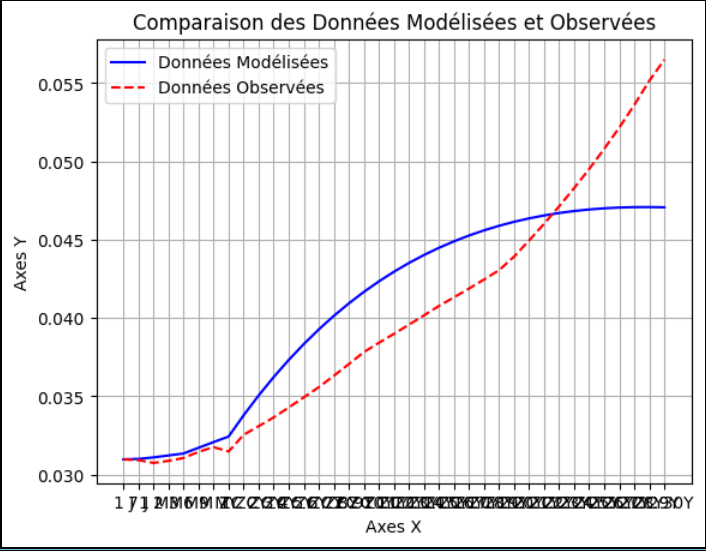

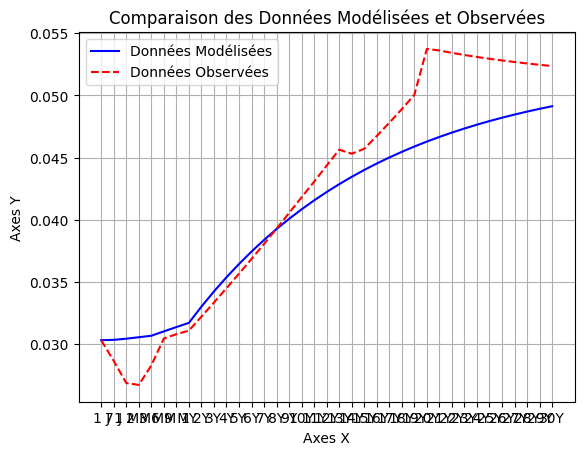

In [19]:
import matplotlib.pyplot as plt

# Données
x = dd.columns[1:]
y1 = data_Modeled.iloc[4000, 1:]
y2 = dd.iloc[4000, 1:]

# Création de la figure et des axes
fig, ax = plt.subplots()

# Tracé des courbes
ax.plot(x, y1, label='Données Modélisées', color='blue', linestyle='-')
ax.plot(x, y2, label='Données Observées', color='red', linestyle='--')

# Personnalisation de la figure
ax.set_xlabel('Axes X')
ax.set_ylabel('Axes Y')
ax.set_title('Comparaison des Données Modélisées et Observées')
ax.grid(True)
ax.legend()

# Affichage de la figure
plt.show()



In [24]:
pr=dd.loc[0]
pr

Date de référence    2024-04-16 00:00:00
1 J                             0.030969
7 J                             0.030923
1 M                             0.030747
2 M                             0.030877
3 M                             0.031061
6 M                             0.031455
9 M                             0.031753
1Y                              0.031472
ZC 2Y                           0.032539
ZC 3Y                            0.03309
ZC 4Y                           0.033649
ZC 5Y                           0.034283
ZC 6Y                           0.034926
ZC 7Y                           0.035579
ZC 8Y                           0.036304
ZC 9Y                           0.037053
ZC 10Y                          0.037817
ZC 11Y                          0.038413
ZC 12Y                          0.038983
ZC 13Y                          0.039566
ZC 14Y                          0.040162
ZC 15Y                          0.040767
ZC 16Y                          0.041313
ZC 17Y          

In [25]:
dd

,Date de référence,1 J,7 J,1 M,2 M,3 M,6 M,9 M,1Y,ZC 2Y,...,ZC 21Y,ZC 22Y,ZC 23Y,ZC 24Y,ZC 25Y,ZC 26Y,ZC 27Y,ZC 28Y,ZC 29Y,ZC 30Y
0,2024-04-16,0.030969,0.030923,0.030747,0.030877,0.031061,0.031455,0.031753,0.031472,0.032539,...,0.044945,0.046014,0.047127,0.048290,0.049510,0.050794,0.052152,0.053596,0.055139,0.056484
1,2024-04-15,0.030969,0.030924,0.030752,0.030869,0.031053,0.031305,0.031544,0.031268,0.032372,...,0.044843,0.045913,0.047027,0.048190,0.049408,0.050691,0.052048,0.053489,0.055029,0.056377
2,2024-04-09,0.030969,0.030929,0.030779,0.030825,0.031009,0.031280,0.031521,0.031245,0.032362,...,0.044905,0.045957,0.047052,0.048196,0.049395,0.050656,0.051989,0.053406,0.054918,0.056272
3,2024-04-08,0.030969,0.030930,0.030783,0.030817,0.031001,0.031276,0.031517,0.031241,0.032360,...,0.044891,0.045944,0.047039,0.048182,0.049381,0.050642,0.051975,0.053391,0.054903,0.056261
4,2024-04-05,0.030969,0.030932,0.030793,0.030795,0.030979,0.031264,0.031529,0.031305,0.032525,...,0.044909,0.045978,0.047091,0.048254,0.049473,0.050757,0.052114,0.053557,0.055099,0.056501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,2005-01-12,0.023367,0.023557,0.024191,0.024434,0.024537,0.025752,0.027378,0.028262,0.031116,...,0.066585,0.066290,0.066021,0.065775,0.065548,0.065339,0.065145,0.064965,0.064798,0.064641
4386,2005-01-06,0.024283,0.023986,0.023639,0.023846,0.024170,0.025744,0.027359,0.028271,0.031277,...,0.067189,0.066879,0.066596,0.066338,0.066099,0.065880,0.065676,0.065487,0.065311,0.065147
4387,2005-01-05,0.024991,0.024411,0.023639,0.023846,0.024170,0.025834,0.027179,0.027948,0.031338,...,0.066660,0.066362,0.066090,0.065840,0.065611,0.065399,0.065203,0.065021,0.064852,0.064694
4388,2005-01-04,0.023544,0.023543,0.023639,0.023846,0.024170,0.025834,0.027597,0.028964,0.031843,...,0.066621,0.066325,0.066054,0.065806,0.065578,0.065368,0.065173,0.064992,0.064824,0.064667


In [26]:


# Fonction pour tracer la structure à terme des taux d'intérêt
def plot_yield_curve(ax, data, title):
    for column in data.columns:
        ax.plot(data.index, data[column], label=column)
    ax.set_title(title)
    ax.set_xlabel('Maturité')
    ax.set_ylabel('Taux')
    ax.grid(True)
    # ax.legend(loc='upper left')

# Créer des DataFrame à partir des données simulées et réelles
simulated_data = data_Modeled_copy
real_data = dd_copy
df_simulated = pd.DataFrame(simulated_data)
df_real = pd.DataFrame(real_data)

# Tracer deux graphes séparés pour les données simulées et réelles
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

plot_yield_curve(axes[0], df_simulated, 'Structure à terme des taux d\'intérêt simulés')
plot_yield_curve(axes[1], df_real, 'Structure à terme des taux d\'intérêt réels')

plt.tight_layout()
plt.show()


NameError: name 'data_Modeled_copy' is not defined

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest
from statsmodels.tsa.stattools import adfuller

# Fonction pour effectuer les tests statistiques
def model_fit_tests(data):
    # Test de normalité (test de D'Agostino et Pearson)
    normality_tests = {}
    for column in data.columns:
        stat, p_value = normaltest(data[column])
        normality_tests[column] = {'statistic': stat, 'p_value': p_value}
    
    # Test de stationnarité (test de Dickey-Fuller augmenté)
    stationarity_tests = {}
    for column in data.columns:
        result = adfuller(data[column])
        stationarity_tests[column] = {'ADF Statistic': result[0], 'p-value': result[1]}
    
    return normality_tests, stationarity_tests

# Supposons que vous avez des données simulées et réelles dans des DataFrames df_simulated et df_real

# Effectuer les tests sur les données simulées
simulated_normality_tests, simulated_stationarity_tests = model_fit_tests(df_simulated)

# Effectuer les tests sur les données réelles
real_normality_tests, real_stationarity_tests = model_fit_tests(df_real)

# Afficher les résultats des tests
print("Tests de normalité pour les données simulées :\n", simulated_normality_tests)
print("\nTests de stationnarité pour les données simulées :\n", simulated_stationarity_tests)

print("\nTests de normalité pour les données réelles :\n", real_normality_tests)
print("\nTests de stationnarité pour les données réelles :\n", real_stationarity_tests)


Tests de normalité pour les données simulées :
 {'1 J': {'statistic': 124.187799221337, 'p_value': 1.0788524178862391e-27}, '7 J': {'statistic': 124.1877992213547, 'p_value': 1.0788524178766952e-27}, '1 M': {'statistic': 124.18779922134668, 'p_value': 1.0788524178810192e-27}, '2 M': {'statistic': 124.18779922134337, 'p_value': 1.0788524178828035e-27}, '3 M': {'statistic': 124.18779922134222, 'p_value': 1.0788524178834266e-27}, '6 M': {'statistic': 124.18779922133943, 'p_value': 1.0788524178849303e-27}, '9 M': {'statistic': 124.1877992213343, 'p_value': 1.0788524178876961e-27}, '1Y': {'statistic': 124.18779922133547, 'p_value': 1.0788524178870653e-27}, 'ZC 2Y': {'statistic': 124.18779922133594, 'p_value': 1.078852417886816e-27}, 'ZC 3Y': {'statistic': 124.1877992213394, 'p_value': 1.078852417884946e-27}, 'ZC 4Y': {'statistic': 124.18779922133773, 'p_value': 1.0788524178858497e-27}, 'ZC 5Y': {'statistic': 124.18779922133793, 'p_value': 1.0788524178857406e-27}, 'ZC 6Y': {'statistic': 124.

*Interpretation des tests:*



Le test de normalité montre que les données ne suivent pas une distribution normale

Le test de stationnarité : les donnes ne sont pas statonnare
Pour les données réelles :

Meme chose pour les donnes reelles!

AIC 

$AIC = G^2 − 2dll + 2N$

In [ ]:
import numpy as np

def calculate_aic(y_obs, y_pred, num_params):
    resid = y_obs - y_pred
    rss = np.sum(resid**2)
    aic = 2 * num_params - 2 * np.log(rss)
    return aic

def calculate_bic(y_obs, y_pred, num_params, num_obs):
    resid = y_obs - y_pred
    rss = np.sum(resid**2)
    bic = num_obs * np.log(rss / num_obs) + num_params * np.log(num_obs)
    return bic

# Suppose dd est les données observées et data_Modeled sont les données modélisées
y_obs = dd['1 J'] # Les taux d'intérêt observés
y_pred = data_Modeled['1 J']  # Les taux d'intérêt modélisés
num_params = 3  # Nombre de paramètres dans le modèle (a, b, sigma)
num_obs = len(y_obs)  # Nombre total d'observations

# Calcul de l'AIC et du BIC
aic = calculate_aic(y_obs, y_pred, num_params)
bic = calculate_bic(y_obs, y_pred, num_params, num_obs)

print("AIC:", aic)
print("BIC:", bic)


AIC: 38.81556605556249
BIC: -108824.30722008532


## Using Time series

Tracçant le taux à court terme.

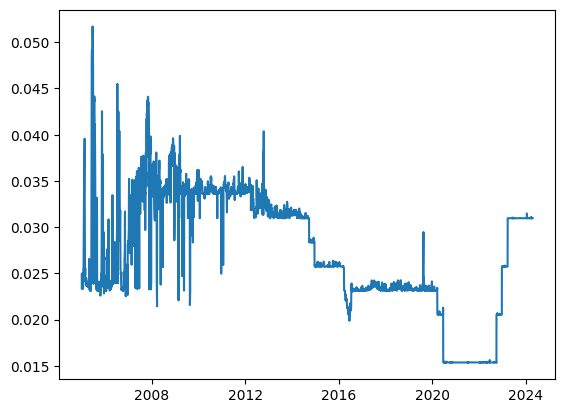

In [ ]:
plt.plot(dd['Date de référence'], dd['1 J'])

In [ ]:
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss

rt=dd['1 J'].to_numpy()

serie_taux_courts = rt

# Test de Dickey-Fuller (ADF)
print("Test de Dickey-Fuller (ADF):")
adf_result = adfuller(serie_taux_courts)
print(f"Statistique ADF: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Test de KPSS
print("\nTest de KPSS:")
kpss_result = kpss(serie_taux_courts)
print(f"Statistique KPSS: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")

Test de Dickey-Fuller (ADF):
Statistique ADF: -2.8166574833033615
p-value: 0.055933478093053886

Test de KPSS:
Statistique KPSS: 5.841806602197795
p-value: 0.01


C:\Users\hp\AppData\Local\Temp\ipykernel_17772\2799099705.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(serie_taux_courts)


-- Le test de ADF montre que la serie est stationnaire;

-- Le test de KPSS montre qu'il y a une tendance non stationnaire.



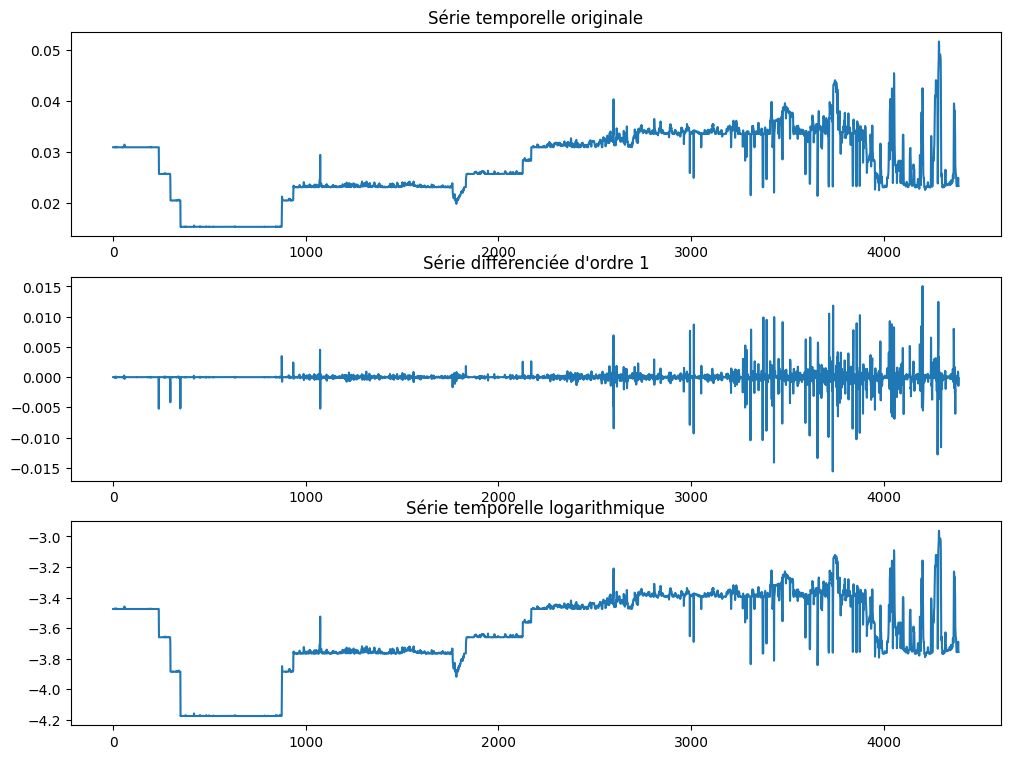

In [ ]:
# Charger la série temporelle (remplacez 'serie_taux_courts' par votre nom de variable)


# Différenciation d'ordre 1
serie_diff =np.diff(rt)

# Visualisation de la série originale et de la série différenciée
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(serie_taux_courts)
plt.title('Série temporelle originale')


plt.subplot(3, 1, 2)
plt.plot(serie_diff)
plt.title('Série différenciée d\'ordre 1')


plt.subplot(3, 1, 3)
plt.plot(np.log(serie_taux_courts))
plt.title('Série temporelle logarithmique')

plt.show()


*Interpretation*
Pour la $1^{ère}$ serie:

- Forte volatilité;

- On remaruqe qu'ils y a des sauts.(periode economique, crise..).

Pour la $2^{ème}$ serie:

- Stationnarité Améliorée : La série semble être plus stationnaire que la série originale. La variance et la moyenne semblent plus constantes;

- Volatilité plus faible.

- Abscece de tendance

In [ ]:
# Test de Dickey-Fuller (ADF)                                
print("Test de Dickey-Fuller (ADF):")                                
adf_result = adfuller(serie_diff)                                
print(f"Statistique ADF: {adf_result[0]}")                                
print(f"p-value: {adf_result[1]}")                                

# Test de KPSS                                
print("\nTest de KPSS:")                                
kpss_result = kpss(serie_diff)                                
print(f"Statistique KPSS: {kpss_result[0]}")                                
print(f"p-value: {kpss_result[1]}")                                

Test de Dickey-Fuller (ADF):
Statistique ADF: -16.582547026392607
p-value: 1.828718314757571e-29

Test de KPSS:
Statistique KPSS: 0.08377977380565639
p-value: 0.1


C:\Users\hp\AppData\Local\Temp\ipykernel_17772\811707819.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(serie_diff)


Nous concluons que notre série est stationnaire, donc nous pouvons procéder au Modele AR(1) 👍

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
data=dd.copy()
# Convertir les dates et trier les données
data['Date de référence'] = pd.to_datetime(data['Date de référence'])
data = data.sort_values('Date de référence')

# Préparer les données pour la régression
data['r_t'] = data['1 J']
data['r_t-1'] = data['1 J'].shift(1)

# Supprimer les NaN résultants du décalage
data = data.dropna()

# Réaliser la régression linéaire
X = data[['r_t-1']]
X = sm.add_constant(X)  # Ajoute une constante pour l'interception
y = data['r_t']

model = sm.OLS(y, X).fit()

# Afficher les résultats de la régression
print(model.summary())

# Estimation des paramètres
beta_0 = model.params['const']
beta_1 = model.params['r_t-1']

# Calculer a, b, et sigma
delta_t = 1  # Assumons des données journalières
a_est = -np.log(beta_1) / delta_t
b_est = beta_0 / (1 - beta_1)
sigma_est = np.sqrt(model.mse_resid * 2 * a_est / (1 - np.exp(-2 * a_est * delta_t)))

print(f'Estimations des paramètres : a = {a_est:.4f}, b = {b_est:.4f}, sigma = {sigma_est:.4f}')


                            OLS Regression Results                            
Dep. Variable:                    r_t   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.260e+05
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        14:43:01   Log-Likelihood:                 23219.
No. Observations:                4389   AIC:                        -4.643e+04
Df Residuals:                    4387   BIC:                        -4.642e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005   7.82e-05      5.980      0.0

$r_t=\beta +\alpha r_{t-1} + \varepsilon $ 

$y_t=\alpha y_{t-1} + \zeta $ avec $r_t-r_{t-1}=y_t$

In [ ]:
data['1 J']

4379    0.023336
4378    0.023773
4377    0.024491
4376    0.025512
4375    0.025700
          ...   
4       0.030969
3       0.030969
2       0.030969
1       0.030969
0       0.030969
Name: 1 J, Length: 4380, dtype: float64

In [ ]:
from scipy.stats import gmean
#  Différenciation des données pour les rendre stationnaires
data['diff_r_t'] = data['r_t'].diff()
data['diff_r_t-1'] = data['r_t-1'].diff()

# Supprimer les NaN résultants de la différenciation
data = data.dropna()
delta_t=1/252
# Réaliser la régression linéaire sur les données différenciées
X_diff = data[['diff_r_t-1']]
# X_diff = sm.add_constant(X_diff)  # Ajoute une constante pour l'interception
y_diff = data['diff_r_t']

model_diff = sm.OLS(y_diff, X_diff).fit()

# Estimation des paramètres à partir des données différenciées
# beta_0_diff = model_diff.params['const']
beta_1_diff = model_diff.params['diff_r_t-1']
beta_0_diff=(1-beta_1_diff)*np.mean(data['r_t'])
delta_t=1
# Calculer a, b, et sigma à partir des données différenciées
a3= -np.log(abs(beta_1_diff)) / delta_t
b3=beta_0_diff/(1-beta_1_diff)
sigma3 = np.sqrt(model_diff.mse_resid * 2 * a3/(1 - np.exp(-2 * a3 * delta_t)))

print(f'Estimations des paramètres après différenciation : a = {a3:.4f}, b = {b3:.10f}, sigma = {sigma3:.4f}')

Estimations des paramètres après différenciation : a = 4.2790, b = 0.0274659189, sigma = 0.0036


In [ ]:
model_diff.params

diff_r_t-1   -0.013718
dtype: float64

### Méthode des moindres carrés

**Discrétisation d'Euler-Maruyama du modèle de Vasicek :**

$$
r_{t+\delta t} - r_t = \alpha \cdot (b - r_t) \cdot \delta t + \sigma \cdot \sqrt{\delta t} \cdot \epsilon \quad \epsilon \sim \mathcal{N}(0,1)
$$

Cette équation peut être réécrite comme suit :

$$
r_{t+\delta t} = \left(1 - \alpha \cdot \delta t\right) \cdot r_t + \alpha \cdot b \cdot \delta t + \sigma \cdot \sqrt{\delta t} \cdot \epsilon
$$

ou

$$
r_{t+\delta t} = \alpha \cdot r_t + \beta + \xi
$$

avec :

$$
\alpha = \left(1 - \alpha \cdot \delta t\right)
$$

$$
\beta = \alpha \cdot b \cdot \delta t
$$

$$
\xi = \sigma \cdot \sqrt{\delta t} \cdot \epsilon \quad \text{iid normalement distribué}
$$



**Estimation par les moindres carrés :**

Les paramètres $ \hat{\alpha}$ et  $\hat{\beta} $ sont estimés par la méthode des moindres carrés (régression linéaire de $r_{t+\delta t}$ sur $r_t$ :

$$
(\hat{\alpha}, \hat{\beta}) = \left( \frac{1 - \hat{\alpha}}{\delta t}, \frac{\hat{\beta}}{1 - \hat{\alpha}} \right)
$$

$$
\hat{\sigma} = \sqrt{\frac{\text{Var}(\xi)}{\delta t}}
$$



### Estimation du maximum de vraisemblance

**Solution de l'EDS pour \(r_{t+\delta t}\) :**

$$
r_{t+\delta t} = r_t \cdot e^{-\alpha \cdot \delta t} + b \cdot (1 - e^{-\alpha \cdot \delta t}) + \sigma \cdot e^{-\alpha \cdot t} \cdot \int_t^{t+\delta t} e^{\alpha \cdot s} \cdot dW_s
$$

**Distribution conditionnelle :**

$$
r_{t+\delta t} \sim \mathcal{N} \left( r_t \cdot e^{-\alpha \cdot \delta t} + b \cdot (1 - e^{-\alpha \cdot \delta t}), \frac{\sigma^2}{2 \alpha} \cdot (1 - e^{-2 \alpha \cdot \delta t}) \right)
$$

**Fonction de distribution de probabilité :**

$$
f(r_t, t; r_{t+\delta t}, t + \delta t) = \frac{1}{\sqrt{2 \pi \Sigma^2}} \cdot e^{-\frac{1}{2} \cdot \left(\frac{r_{t+\delta t} - r_t \cdot e^{-\alpha \cdot \delta t} - b \cdot (1 - e^{-\alpha \cdot \delta t})}{\Sigma}\right)^2}
$$

**Log-vraisemblance :**

$$
\ln \left( \prod_{i=0}^{n-1} f(r_{t_i}, t_i; r_{t_{i+1}}, t_{i+1}) \right)
$$

ou, simplifié :

$$
L(\alpha, b, \sigma) = -\frac{n}{2} \cdot \ln \left( \frac{\sigma^2}{2 \alpha} \cdot (1 - e^{-2 \alpha \cdot \delta t}) \right) - \frac{n}{2} \cdot \ln (2 \pi) - \frac{\alpha}{\sigma^2 \cdot (1 - e^{-2 \alpha \cdot \delta t})} \cdot \sum_{i=0}^{n-1} \left( r_{t_{i+1}} - r_{t_i} \cdot e^{-\alpha \cdot \delta t} - b \cdot (1 - e^{-\alpha \cdot \delta t}) \right)^2
$$



**Paramètres maximisant la log-vraisemblance :**

$$
\hat{\alpha} = \frac{1}{\delta t} \cdot \ln \left( \frac{S_0 - \hat{b}}{S_1 - \hat{b}} \right)
$$

$$
\hat{b} = \frac{S_1 \cdot S_{00} - S_0 \cdot S_{01}}{S_0 \cdot S_1 - S_{01}}
$$

$$
\hat{\sigma}^2 = \frac{1}{n \cdot \beta \cdot \left( 1 - \frac{1}{2} \alpha \cdot \beta \right)} \cdot \sum_{i=1}^{n} \left( r_{t_i} - m_{t_{i-1}}(t_i) \right)^2
$$

avec :

$$
S_0 = \frac{1}{n} \sum_{i=1}^{n} r_{t_{i-1}}
$$

$$
S_1 = \frac{1}{n} \sum_{i=1}^{n} r_{t_i}
$$

$$
S_{00} = \frac{1}{n} \sum_{i=1}^{n} r_{t_{i-1}}^2
$$

$$
S_{01} = \frac{1}{n} \sum_{i=1}^{n} r_{t_{i-1}} \cdot r_{t_i}
$$

$$
\beta = \frac{1}{\alpha} \cdot (1 - e^{-\alpha \cdot \delta t})
$$

$$
m_{t_{i-1}}(t_i) = b \cdot \alpha \cdot \beta + r_{t_{i-1}} \cdot (1 - \alpha \cdot \beta)
$$

In [ ]:
data=dd['1 J'].values


### MLV

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

data=dd['1 J']
# Définir la fonction de log-vraisemblance
def vasicek_log_likelihood(params, data, delta_t):
    alpha, b, sigma = params
    n = len(data) - 1
    r_t = data[:-1]
    r_t_plus_delta_t = data[1:]
    
    beta = r_t * np.exp(-alpha * delta_t) + b * (1 - np.exp(-alpha * delta_t))
    sigma_squared = (sigma**2 / (2 * alpha)) * (1 - np.exp(-2 * alpha * delta_t))
    
    log_likelihood = - (n / 2) * np.log(2 * np.pi) - (n / 2) * np.log(sigma_squared) - (1 / (2 * sigma_squared)) * np.sum((r_t_plus_delta_t - beta)**2)
    
    return -log_likelihood

# Charger vos données
# Remplacer la ligne ci-dessous par le chargement de vos données réelles
# data = pd.read_csv('path_to_your_data.csv')['1 J'].values

# Pour cet exemple, on utilise les données synthétiques générées ci-dessus
data = r_t

# Supprimer les lignes ci-dessous si vous avez vos propres données
# r_t = data

# Supposons des données quotidiennes, delta_t est 1/252
delta_t = 1/252

# Hypothèse initiale pour les paramètres
initial_params = [0.1, 0.01, 0.02]

# Minimiser la log-vraisemblance négative
result = minimize(vasicek_log_likelihood, initial_params, args=(data, delta_t), method='L-BFGS-B', bounds=[(0, None), (None, None), (0, None)])
alpha_est, b_est, sigma_est = result.x

print(f"Estimated alpha: {alpha_est}")
print(f"Estimated b: {b_est}")
print(f"Estimated sigma: {sigma_est}")

# Optionnellement, vous pouvez visualiser le modèle ajusté par rapport aux données
plt.plot(data, label='Data')
plt.plot([data[0]] + list(alpha_est * np.exp(-alpha_est * np.arange(1, len(data)) * delta_t) + b_est * (1 - np.exp(-alpha_est * np.arange(1, len(data)) * delta_t))), label='Fitted Model')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd



# Supposons que votre fichier de données a une colonne nommée '1 J' avec les taux d'intérêt à court terme
r_t = data

# Supposons des données quotidiennes, delta_t est 1/252
delta_t = 1/252
n = len(r_t) - 1

# Calculer les moyennes nécessaires
S_0 = np.sum(r_t[:-1])/n
S_1 = np.sum(r_t[1:])/n
S_00 = np.sum(r_t[:-1] * r_t[:-1])/n
S_01 = np.sum(r_t[:-1] * r_t[1:])/n

# Calculer les paramètres \(\hat{b}\), \(\hat{\alpha}\), \(\hat{\sigma}^2\)
b_hat = (S_1 * S_00 - S_0 * S_01) / (S_0 * S_1 - S_0**2-S_01+S_00)
alpha_hat = np.log((S_0 - b_hat) / (S_1 - b_hat)) / delta_t

beta = (1 - np.exp(-alpha_hat * delta_t)) / alpha_hat
sigma_squared_hat = (1 / (n * beta * (1 - 0.5 * alpha_hat * beta))) * np.sum((r_t[1:] - (b_hat * alpha_hat * (1 - np.exp(-alpha_hat * delta_t)) + r_t[:-1] * np.exp(-alpha_hat * delta_t)))**2)

sigma_hat = np.sqrt(sigma_squared_hat)

print(f"Estimated alpha: {alpha_hat}")
print(f"Estimated b: {b_hat}")
print(f"Estimated sigma: {sigma_hat}")


## MCO

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Supposons que votre fichier de données a une colonne nommée '1 J' avec les taux d'intérêt à court terme
r_t = data

# Supposons des données quotidiennes, delta_t est 1/252
delta_t = 1 / 252
n = len(r_t) - 1

# Régression linéaire de r_{t+\delta t} sur r_t
x = r_t[:-1]
y = r_t[1:]

# Régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Estimation des paramètres
alpha_hat = (1 - slope) / delta_t    
beta_hat = intercept / (1 - slope)    
residuals = y - (slope * x + intercept)    
sigma_hat = np.sqrt(np.var(residuals) / delta_t)             
                                                     
print(f"Estimated alpha: {alpha_hat}")        
print(f"Estimated b: {beta_hat}")        
print(f"Estimated sigma: {sigma_hat}")        

# Optionnellement, vous pouvez visualiser le modèle ajusté par rapport aux données
import matplotlib.pyplot as plt

plt.plot(r_t, label='Data')
plt.plot([r_t[0]] + list(slope * x + intercept), label='Fitted Model', linestyle='--')
plt.legend()           
plt.show()          


In [ ]:
[r_t[0]]

[0.03096857993153357]